## Introduction

In this notebook I will explore Toronto and Manhattan and use the tools learned in this course to compare both cities.  
I will segment and cluster both cities and try to demonstrate from the data that they are  similar and both have a vibrant and rich environment.


## Table of contents

* 1. [Download the necessary packages](#1)
* 2. [Toronto, CA](#2)  
    * 2.1. [Get the data for Toronto](#2.1)  
    * 2.2. [Clean the data](#2.2)  
    * 2.2. [Create a new dataframe](#2.3)  
    * 2.4. [Get the *csv* file with the geolocation data](#2.4)  
    * 2.5. [Define Foursquare Credentials and Version](#2.5)  
    * 2.6. [Explore Neighborhoods in Toronto](#2.6)  
    * 2.7. [Analyze Each Toronto Neighborhood](#2.7)  
    * 2.8. [Cluster Toronto Neighborhood](#2.8)  
    * 2.9. [Examine Toronto Clusters](#2.9)  
      * 2.9.1. [Toronto Cluster 1](#2.9.1)  
      * 2.9.2. [Toronto Cluster 2](#2.9.2)  
      * 2.9.3. [Toronto Cluster 3](#2.9.3)  
      * 2.9.4. [Toronto Cluster 4](#2.9.4)  
      * 2.9.5. [Toronto Cluster 5](#2.9.5)
* 3. [Manhattan, NY](#3)  
    * 3.1. [Download and Explore Dataset for NY](#3.1)  
    * 3.2. [Review the data](#3.2)  
    * 3.2. [Create a new dataframe](#3.3)  
    * 3.3. [Explore Neighborhoods in Manhattan](#3.3)  
    * 3.4. [Analyze Each Manhattan Neighborhood](#3.4)  
    * 3.5. [Cluster Manhattan Neighborhood](#3.5)  
    * 3.6. [Examine Manhattan Clusters](#3.6)  
      * 3.6.1. [Manhattan Cluster 1](#3.6.1)  
      * 3.6.2. [Manhattan Cluster 2](#3.6.2)  
      * 3.6.3. [Manhattan Cluster 3](#3.6.3)  
      * 3.6.4. [Manhattan Cluster 4](#3.6.4)  
      * 3.6.5. [Manhattan Cluster 5](#3.6.5)
* 4. [Comparisons](#4) 
* 5. [Conclusions](#5) 

### 1. Download Packages <a name="1"></a>



In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


print('Folium installed')
print('Libraries imported.')

Solving environment: \ 
  - anaconda::ca-certificates-2018.03.07-0, anaconda::certifi-2018.11.29-py37_0, anaconda::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, anaconda::openssl-1.1.1a-h1de35cc_0, defaults::certifi-2018.11.29-py37_0
  - anaconda::certifi-2018.11.29-py37_0, anaconda::openssl-1.1.1a-h1de35cc_0, defaults::ca-certificates-2018.03.07-0
  - anaconda::openssl-1.1.1a-h1de35cc_0, defaults::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0
  - anaconda::certifi-2018.11.29-py37_0, defaults::ca-certificates-2018.03.07-0, defaults::openssl-1.1.1a-h1de35cc_0
  - defaults::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, anaconda::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35ccdone

# All requested packages already inst

## 2. TORONTO, CA <a name="2"></a>


### 2.1. Get the data for Toronto <a name="2.1"></a>


We will get the Toronto neighborhood data using BeautifulSoup to scrape a Wikipedia page that contains all the information we need to explore and cluster the neighborhoods in Toronto. 

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [2]:
from bs4 import BeautifulSoup
import requests


# wikipedia 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
# check for status code and headers


#url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

print(result.status_code)
print(result.headers)

200
{'Date': 'Thu, 20 Jun 2019 00:34:41 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '14905', 'Connection': 'keep-alive', 'Server': 'mw1250.eqiad.wmnet', 'X-Content-Type-Options': 'nosniff', 'P3P': 'CP="This is not a P3P policy! See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'X-Powered-By': 'HHVM/3.18.6-dev', 'Content-language': 'en', 'Last-Modified': 'Thu, 06 Jun 2019 10:22:24 GMT', 'Backend-Timing': 'D=115674 t=1560713058801083', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding,Cookie,Authorization,X-Seven', 'X-Varnish': '879429478 708786804, 482438689 9210034', 'Via': '1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1)', 'Age': '56053', 'X-Cache': 'cp1081 hit/2, cp1077 hit/41', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Set-Cookie': 'WMF-Last-Access=20-Jun-2019;Path=/;HttpOnly;secure;Expires=Mon, 22 Jul 2019 00:0


### 2.2. Clean the data <a name="2.2"></a>
  

In [3]:
soup = BeautifulSoup(result.content, 'html.parser')
table = soup.find('table')
trs = table.find_all('tr')
rows = []
for tr in trs:
    i = tr.find_all('td')
    if i:
        rows.append(i)
        
lst = []
for row in rows:
    postalcode = row[0].text.rstrip()
    borough = row[1].text.rstrip()
    neighborhood = row[2].text.rstrip()
    if borough != 'Not assigned':
        if neighborhood == 'Not assigned':
            neighborhood = borough
        lst.append([postalcode, borough, neighborhood])

lst

[['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Harbourfront'],
 ['M5A', 'Downtown Toronto', 'Regent Park'],
 ['M6A', 'North York', 'Lawrence Heights'],
 ['M6A', 'North York', 'Lawrence Manor'],
 ['M7A', "Queen's Park", "Queen's Park"],
 ['M9A', 'Etobicoke', 'Islington Avenue'],
 ['M1B', 'Scarborough', 'Rouge'],
 ['M1B', 'Scarborough', 'Malvern'],
 ['M3B', 'North York', 'Don Mills North'],
 ['M4B', 'East York', 'Woodbine Gardens'],
 ['M4B', 'East York', 'Parkview Hill'],
 ['M5B', 'Downtown Toronto', 'Ryerson'],
 ['M5B', 'Downtown Toronto', 'Garden District'],
 ['M6B', 'North York', 'Glencairn'],
 ['M9B', 'Etobicoke', 'Cloverdale'],
 ['M9B', 'Etobicoke', 'Islington'],
 ['M9B', 'Etobicoke', 'Martin Grove'],
 ['M9B', 'Etobicoke', 'Princess Gardens'],
 ['M9B', 'Etobicoke', 'West Deane Park'],
 ['M1C', 'Scarborough', 'Highland Creek'],
 ['M1C', 'Scarborough', 'Rouge Hill'],
 ['M1C', 'Scarborough', 'Port Union'],
 ['M3C', 'North 


### 2.3. Create a new dataframe <a name="2.3"></a>


In [4]:
df = pd.DataFrame(lst, columns= ['postalcode', 'borough', 'neighborhood'])
print(df.shape)

(211, 3)


   - Delete rows with "Not assigned" and generate a new dataframe called *df_final*

In [5]:
df_final = df[df.borough != 'Not assigned']
df_final.reset_index(drop = True, inplace = True)

df_final = df.groupby(['postalcode', 'borough'], as_index=False).agg(lambda neighborhoods: ', '.join(neighborhoods))

In [6]:
df_final.head()

postalcode      borough                            neighborhood
0        M1B  Scarborough                          Rouge, Malvern
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

In [7]:
df_final.shape

(103, 3)

   - Add columns Latitude & Longitude in *df_final*

In [8]:
df_final['Latitude'] = 0.00
df_final['Longitude'] = 0.00


### 2.4. Get the *csv* file with the geolocation data  <a name="2.4"></a>



In [9]:
!wget -O Geospatial_Coordinates.csv http://cocl.us/Geospatial_data/

--2019-06-19 20:34:41--  http://cocl.us/Geospatial_data/
Resolving cocl.us... 169.48.113.201
Connecting to cocl.us|169.48.113.201|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data/ [following]
--2019-06-19 20:34:41--  https://cocl.us/Geospatial_data/
Connecting to cocl.us|169.48.113.201|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2019-06-19 20:34:42--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com... 107.152.27.197, 107.152.26.197
Connecting to ibm.box.com|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2019-06-19 20:34:42--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing conne

 #### - Read the data and create a new dataframe *df_geocord*

In [10]:
df_geocord = pd.read_csv('Geospatial_Coordinates.csv')
df_geocord.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

 #### - Pull geolocation data from *df_geocord* and add to *df_final*   
 #### - Print first 5 rows of the updated dataframe

In [11]:
for idx in df_final.index:
    geocord_idx = df_geocord['Postal Code'] == df_final.loc[idx, 'postalcode']
    df_final.at[idx, 'Latitude'] = df_geocord.loc[geocord_idx, 'Latitude'].values
    df_final.at[idx, 'Longitude'] = df_geocord.loc[geocord_idx, 'Longitude'].values


df_final.head()

postalcode      borough                            neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [12]:
df_final.shape

(103, 5)

 #### - Check the number of *boroughs* and *neighborhoods* in the dataframe

In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_final['borough'].unique()),
        df_final.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [14]:
df_final.head()

postalcode      borough                            neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476


### 2.5. Define Foursquare Credentials and Version <a name="2.5"></a>   



In [15]:
CLIENT_ID = 'VD3ERGIFB2LCDFYRZANSUH3F35RHGE54I53Y1A4KCLEGEYG3' # Foursquare ID
CLIENT_SECRET = 'J2TEKN3YEOXRHWZZUM4HSWAF3NFROX1FVSVDHJBGG2A5YXGU' # Foursquare Secret
VERSION = '20180605' # API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VD3ERGIFB2LCDFYRZANSUH3F35RHGE54I53Y1A4KCLEGEYG3
CLIENT_SECRET:J2TEKN3YEOXRHWZZUM4HSWAF3NFROX1FVSVDHJBGG2A5YXGU


In [16]:
 # create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, 43.806686, -79.194353, 50, LIMIT)
            
# make the GET request
results = requests.get(url).json()

In [17]:
results

{'meta': {'code': 200, 'requestId': '5d0ad4a4c0c08400256e31c4'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 43.80713600045, 'lng': -79.19373061807617},
   'sw': {'lat': 43.80623599955, 'lng': -79.19497538192384}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}


### 2.6. Explore Neighborhoods in Toronto <a name="2.6"></a>   



In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

 #### - Run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [19]:
toronto_venues = getNearbyVenues(names=df_final['neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [20]:
print(toronto_venues.shape)
toronto_venues_total=toronto_venues.shape[0]
toronto_venues.head()

(2258, 7)


Neighborhood  Neighborhood Latitude  \
0                          Rouge, Malvern              43.806686   
1                          Rouge, Malvern              43.806686   
2  Highland Creek, Rouge Hill, Port Union              43.784535   
3  Highland Creek, Rouge Hill, Port Union              43.784535   
4       Guildwood, Morningside, West Hill              43.763573   

   Neighborhood Longitude                            Venue  Venue Latitude  \
0              -79.194353                          Wendy's       43.807448   
1              -79.194353            Interprovincial Group       43.805630   
2              -79.160497           Chris Effects Painting       43.784343   
3              -79.160497            Royal Canadian Legion       43.782533   
4              -79.188711  Swiss Chalet Rotisserie & Grill       43.767697   

   Venue Longitude              Venue Category  
0       -79.199056        Fast Food Restaurant  
1       -79.200378                  Print Shop  
2       -79.163742  Construction & Landscaping  
3       -79.163085                         Bar  
4       -79.189914                 Pizza Place

#### - Number of venues returned for each neighborhood

In [21]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Adelaide, King, Richmond                                              100   
Agincourt                                                               4   
Agincourt North, L'Amoreaux East, Milliken, Ste...                      3   
Albion Gardens, Beaumond Heights, Humbergate, J...                     11   
Alderwood, Long Branch                                                 10   
Bathurst Manor, Downsview North, Wilson Heights                        18   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      25   
Berczy Park                                                            55   
Birch Cliff, Cliffside West                                             4   
Bloordale Gardens, Eringate, Markland Wood, Old...                      6   
Brockton, Exhibition Place, Parkdale Village                           22   
Business Reply Mail Processing Centre 969 Eastern                      19   
CFB Toronto, Downsview East                                             3   
CN Tower, Bathurst Quay, Island airport, Harbou...                     15   
Cabbagetown, St. James Town                                            46   
Caledonia-Fairbanks                                                     6   
Canada Post Gateway Processing Centre                                  10   
Cedarbrae                                                               8   
Central Bay Street                                                     88   
Chinatown, Grange Park, Kensington Market                             100   
Christie                                                               15   
Church and Wellesley                                                   87   
Clairlea, Golden Mile, Oakridge                                        10   
Clarks Corners, Sullivan, Tam O'Shanter                                10   
Cliffcrest, Cliffside, Scarborough Village West                         3   
Cloverdale, Islington, Martin Grove, Princess G...                      1   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             38   
Davisville North                                                        9   
Deer Park, Forest Hill SE, Rathnelly, South Hil...                     14   
Del Ray, Keelesdale, Mount Dennis, Silverthorn                          4   
Design Exchange, Toronto Dominion Centre                              100   
Don Mills North                                                         5   
Dorset Park, Scarborough Town Centre, Wexford H...                      6   
Dovercourt Village, Dufferin                                           20   
Downsview Central                                                       4   
Downsview Northwest                                                     5   
Downsview West                                                          4   
Downsview, North Park, Upwood Park                                      5   
East Birchmount Park, Ionview, Kennedy Park                             4   
East Toronto                                                            3   
Emery, Humberlea                                                        1   
Fairview, Henry Farm, Oriole                                           66   
First Canadian Place, Underground city                                100   
Flemingdon Park, Don Mills South                                       23   
Forest Hill North, Forest Hill West                                     4   
Glencairn                                                               4   
Guildwood, Morningside, West Hill                                       9   
Harbord, University of Toronto                                         34   
Harbourfront East, Toronto Islands, Union Statio

####  - Number of unique categories in all the returned venues

In [22]:
toronto_venues_uni=len(toronto_venues['Venue Category'].unique())
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 280 uniques categories.



### 2.7. Analyze Each Toronto Neighborhood <a name="2.7"></a>
   
  

In [23]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  Airport  \
0            0                  0               0                  0        0   
1            0                  0               0                  0        0   
2            0                  0               0                  0        0   
3            0                  0               0                  0        0   
4            0                  0               0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    0               0                 0                 0   
2     0    0               0                 0                 0   
3     0    1               0                 0                 0   
4     0    0               0                 0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0          0       0              0          0         0   
1                   0          0       0              0          0         0   
2                   0          0       0              0          0         0   
3                   0          0       0              0          0         0   
4                   0          0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0 

In [24]:
toronto_onehot.shape

(2258, 280)

#### - Group rows by neighborhood using the mean of the frequency of occurrence of each category

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                            Adelaide, King, Richmond     0.000000   
1                                           Agincourt     0.000000   
2   Agincourt North, L'Amoreaux East, Milliken, St...     0.000000   
3   Albion Gardens, Beaumond Heights, Humbergate, ...     0.000000   
4                              Alderwood, Long Branch     0.000000   
5     Bathurst Manor, Downsview North, Wilson Heights     0.000000   
6                                     Bayview Village     0.000000   
7                   Bedford Park, Lawrence Manor East     0.000000   
8                                         Berczy Park     0.000000   
9                         Birch Cliff, Cliffside West     0.000000   
10  Bloordale Gardens, Eringate, Markland Wood, Ol...     0.000000   
11       Brockton, Exhibition Place, Parkdale Village     0.045455   
12  Business Reply Mail Processing Centre 969 Eastern     0.052632   
13                        CFB Toronto, Downsview East     0.000000   
14  CN Tower, Bathurst Quay, Island airport, Harbo...     0.000000   
15                        Cabbagetown, St. James Town     0.000000   
16                                Caledonia-Fairbanks     0.000000   
17              Canada Post Gateway Processing Centre     0.000000   
18                                          Cedarbrae     0.000000   
19                                 Central Bay Street     0.011364   
20          Chinatown, Grange Park, Kensington Market     0.000000   
21                                           Christie     0.000000   
22                               Church and Wellesley     0.011494   
23                    Clairlea, Golden Mile, Oakridge     0.000000   
24            Clarks Corners, Sullivan, Tam O'Shanter     0.000000   
25    Cliffcrest, Cliffside, Scarborough Village West     0.000000   
26  Cloverdale, Islington, Martin Grove, Princess ...     0.000000   
27                     Commerce Court, Victoria Hotel     0.000000   
28                                         Davisville     0.000000   
29                                   Davisville North     0.000000   
30  Deer Park, Forest Hill SE, Rathnelly, South Hi...     0.000000   
31     Del Ray, Keelesdale, Mount Dennis, Silverthorn     0.000000   
32           Design Exchange, Toronto Dominion Centre     0.000000   
33                                    Don Mills North     0.000000   
34  Dorset Park, Scarborough Town Centre, Wexford ...     0.000000   
35                       Dovercourt Village, Dufferin     0.000000   
36                                  Downsview Central     0.000000   
37                                Downsview Northwest     0.000000   
38                                     Downsview West     0.000000   
39                 Downsview, North Park, Upwood Park     0.000000   
40        East Birchmount Park, Ionview, Kennedy Park     0.000000   
41                                       East Toronto     0.000000   
42                                   Emery, Humberlea     0.000000   
43                       Fairview, Henry Farm, Oriole     0.000000   
44             First Canadian Place, Underground city     0.000000   
45                   Flemingdon Park, Don Mills South     0.000000   
46                Forest Hill North, Forest Hill West     0.000000   
47                                          Glencairn     0.000000   
48                  Guildwood, Morningside, West Hill     0.000000   
49                     Harbord, University of Toronto     0.000000   
50  Harbourfront East, Toronto Islands, Union Station     0.000000   
51                          Harbourfront, Regent Park     0.020833   
52                      High Park, The Junction South     0.000000   
53             Highland Creek, Rouge Hill, Port Union     0.000000   
54                                  Hillcrest Village     0.000000   
55       Humber Bay Shores, Mimico South, New Toronto     0.000000   
56  Humber Bay, King's Mill Park, Kingsway Park So.

In [26]:
toronto_grouped.shape

(100, 280)

#### - Print top 5 most commont venues for each neighborhood

In [27]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0                 Café  0.05
1          Coffee Shop  0.05
2                  Bar  0.04
3           Steakhouse  0.04
4  American Restaurant  0.04


----Agincourt----
                venue  freq
0      Sandwich Place  0.25
1              Lounge  0.25
2      Breakfast Spot  0.25
3  Chinese Restaurant  0.25
4         Yoga Studio  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                       venue  freq
0                 Playground  0.33
1           Asian Restaurant  0.33
2                       Park  0.33
3                Yoga Studio  0.00
4  Middle Eastern Restaurant  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0         Grocery Store  0.18
1           Pizza Place  0.09
2           Coffee Shop  0.09
3        Sandwich Place  0.09
4  Fast Food Restaurant  0.09


----Alderwood, Long Branch

                        venue  freq
0  Construction & Landscaping   0.2
1                      Bakery   0.2
2                        Park   0.2
3               Deli / Bodega   0.2
4            Basketball Court   0.2


----East Birchmount Park, Ionview, Kennedy Park----
               venue  freq
0     Discount Store  0.25
1         Playground  0.25
2   Department Store  0.25
3        Coffee Shop  0.25
4  Mobile Phone Shop  0.00


----East Toronto----
                       venue  freq
0                       Park  0.33
1                Coffee Shop  0.33
2          Convenience Store  0.33
3                Yoga Studio  0.00
4  Middle Eastern Restaurant  0.00


----Emery, Humberlea----
                             venue  freq
0                   Baseball Field   1.0
1                      Yoga Studio   0.0
2              Monument / Landmark   0.0
3  Molecular Gastronomy Restaurant   0.0
4       Modern European Restaurant   0.0


----Fairview, Henry Farm, Oriole----
                  venue

                venue  freq
0         Coffee Shop  0.08
1                Café  0.08
2         Pizza Place  0.08
3    Sushi Restaurant  0.05
4  Italian Restaurant  0.05


----Ryerson, Garden District----
                       venue  freq
0                Coffee Shop  0.10
1             Clothing Store  0.08
2             Cosmetics Shop  0.04
3                       Café  0.04
4  Middle Eastern Restaurant  0.03


----Scarborough Village----
                       venue  freq
0                 Playground   1.0
1                Yoga Studio   0.0
2  Middle Eastern Restaurant   0.0
3                      Motel   0.0
4        Monument / Landmark   0.0


----Silver Hills, York Mills----
                             venue  freq
0                        Cafeteria   1.0
1        Middle Eastern Restaurant   0.0
2                            Motel   0.0
3              Monument / Landmark   0.0
4  Molecular Gastronomy Restaurant   0.0


----St. James Town----
         venue  freq
0         Café  0.06

####  - Put that into a *pandas* dataframe and sort in descending order

In [28]:
# Sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

####  - Create a new dataframe and display the top 10 venues for each neighborhood

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond           Coffee Shop   
1                                          Agincourt    Chinese Restaurant   
2  Agincourt North, L'Amoreaux East, Milliken, St...                  Park   
3  Albion Gardens, Beaumond Heights, Humbergate, ...         Grocery Store   
4                             Alderwood, Long Branch           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café            Steakhouse                   Bar   
1                Lounge        Sandwich Place        Breakfast Spot   
2      Asian Restaurant            Playground         Women's Store   
3          Liquor Store        Sandwich Place   Fried Chicken Joint   
4           Coffee Shop                   Gym          Skating Rink   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0   American Restaurant                   Gym        Cosmetics Shop   
1         Women's Store        Discount Store               Dog Run   
2            Donut Shop    Dim Sum Restaurant                 Diner   
3           Video Store           Coffee Shop              Pharmacy   
4              Pharmacy                   Pub          Dance Studio   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                 Hotel          Burger Joint             Restaurant  
1      Doner Restaurant            Donut Shop              Drugstore  
2        Discount Store               Dog Run       Doner Restaurant  
3           Pizza Place            Beer Store   Fast Food Restaurant  
4                  Pool        Sandwich Place          Women's Store


### 2.8. Cluster Toronto Neighborhood <a name="2.8"></a>
   


Run *k*-means to cluster the neighborhood into 5 clusters.

In [30]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 3, 0, 0, 0], dtype=int32)

In [31]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(20) # check the last columns!

Neighborhood  Neighborhood Latitude  \
0                           Rouge, Malvern              43.806686   
1                           Rouge, Malvern              43.806686   
2   Highland Creek, Rouge Hill, Port Union              43.784535   
3   Highland Creek, Rouge Hill, Port Union              43.784535   
4        Guildwood, Morningside, West Hill              43.763573   
5        Guildwood, Morningside, West Hill              43.763573   
6        Guildwood, Morningside, West Hill              43.763573   
7        Guildwood, Morningside, West Hill              43.763573   
8        Guildwood, Morningside, West Hill              43.763573   
9        Guildwood, Morningside, West Hill              43.763573   
10       Guildwood, Morningside, West Hill              43.763573   
11       Guildwood, Morningside, West Hill              43.763573   
12       Guildwood, Morningside, West Hill              43.763573   
13                                  Woburn              43.770992   
14                                  Woburn              43.770992   
15                                  Woburn              43.770992   
16                                  Woburn              43.770992   
17                               Cedarbrae              43.773136   
18                               Cedarbrae              43.773136   
19                               Cedarbrae              43.773136   

    Neighborhood Longitude                            Venue  Venue Latitude  \
0               -79.194353                          Wendy's       43.807448   
1               -79.194353            Interprovincial Group       43.805630   
2               -79.160497           Chris Effects Painting       43.784343   
3               -79.160497            Royal Canadian Legion       43.782533   
4               -79.188711  Swiss Chalet Rotisserie & Grill       43.767697   
5               -79.188711                G & G Electronics       43.765309   
6               -79.188711                       Marina Spa       43.766000   
7               -79.188711                 Big Bite Burrito       43.766299   
8               -79.188711                     chatr Mobile       43.765917   
9               -79.188711            Enterprise Rent-A-Car       43.764076   
10              -79.188711            Woburn Medical Centre       43.766631   
11              -79.188711     Lawrence Ave E & Kingston Rd       43.767704   
12              -79.188711                         Eggsmart       43.767800   
13              -79.216917                        Starbucks       43.770037   
14              -79.216917                      Tim Hortons       43.770827   
15              -79.216917               Korean Grill House       43.770812   
16              -79.216917            Jessies Variety Store       43.772778   
17              -79.239476              Federick Restaurant       43.774697   
18              -79.239476         Drupati's Roti & Doubles       43.775222   
19              -79.239476                      Thai One On       43.774468   

    Venue Longitude              Venue Category  Cluster Labels  \
0        -79.199056        Fast Food Restaurant               0   
1        -79.200378                  Print Shop               0   
2        -79.163742  Construction & Landscaping               0   
3        -79.163085                         Bar               0   
4        -79.189914                 Pizza Place               0   
5        -79.191537           Electronics Store               0   
6        -79.191000                         Spa               0   
7        -79.190720          Mexican Restaurant               0   
8        -79.191672                Tech Startup               0   
9        -79.193406         Rental Car Location               0   
10       -79.192286              Medical Center               0   
11       -79.189490                Intersection               0   
12       -79.190466              Breakfast Spot  


### 2.9. Examine Toronto Clusters <a name="2.9"></a>
   
  

####  - Visualization of the resulting clusters

In [32]:
address = 'Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


#### 2.9.1.  Toronto Cluster 1 <a name="2.9.1"></a>
   


In [34]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude                   Venue Category  \
0                 43.806686       -79.199056             Fast Food Restaurant   
1                 43.806686       -79.200378                       Print Shop   
2                 43.784535       -79.163742       Construction & Landscaping   
3                 43.784535       -79.163085                              Bar   
4                 43.763573       -79.189914                      Pizza Place   
5                 43.763573       -79.191537                Electronics Store   
6                 43.763573       -79.191000                              Spa   
7                 43.763573       -79.190720               Mexican Restaurant   
8                 43.763573       -79.191672                     Tech Startup   
9                 43.763573       -79.193406              Rental Car Location   
10                43.763573       -79.192286                   Medical Center   
11                43.763573       -79.189490                     Intersection   
12                43.763573       -79.190466                   Breakfast Spot   
13                43.770992       -79.221156                      Coffee Shop   
14                43.770992       -79.223078                      Coffee Shop   
15                43.770992       -79.214502                Korean Restaurant   
16                43.770992       -79.222500                Convenience Store   
17                43.773136       -79.241142                 Hakka Restaurant   
18                43.773136       -79.241678             Caribbean Restaurant   
19                43.773136       -79.241268                  Thai Restaurant   
20                43.773136       -79.236500               Athletics & Sports   
21                43.773136       -79.241343                             Bank   
22                43.773136       -79.243877                           Bakery   
23                43.773136       -79.241962                           Lounge   
24                43.773136       -79.235328              Fried Chicken Joint   
25                43.744734       -79.239336                       Playground   
26                43.727929       -79.266240                 Department Store   
27                43.727929       -79.266157                      Coffee Shop   
28                43.727929       -79.259852                       Playground   
29                43.727929       -79.266830                   Discount Store   
30                43.711112       -79.290701             Fast Food Restaurant   
31                43.711112       -79.281005                     Intersection   
32                43.711112       -79.279714                         Bus Line   
33                43.711112       -79.279602                    Metro Station   
34                43.711112       -79.279588                         Bus Line   
35                43.711112       -79.279576                      Bus Station   
36                43.711112       -79.279506                           Bakery   
37                43.711112       -79.279469                           Bakery   
38                43.711112       -79.278966                             Park   
39                43.711112       -79.286506                     Soccer Field   
40                43.716316       -79.240135                            Motel   
41                43.716316       -79.242353              American Restaurant   
42                43.716316       -79.239164                            Motel   
43                43.692657       -79.264532                             Café   
44                43.692657       -79.262161            General Entertainment   
45                43.692657       -79.262230                     Skating Rink   
46                43.692657       -79.261293                  College Stadium   
47                43.757410       -79.276945                Indian Restaurant   
48                43.757410       -79


#### 2.9.2. Toronto Cluster 2 <a name="2.9.2"></a>
   


In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude        Venue Category  \
74                43.815252       -79.289773                  Park   
75                43.815252       -79.289824      Asian Restaurant   
76                43.815252       -79.289867            Playground   
201               43.752758       -79.401004                  Bank   
202               43.752758       -79.401393     Convenience Store   
203               43.752758       -79.399717                  Park   
204               43.752758       -79.401712                  Park   
205               43.752758       -79.405016                   Bar   
211               43.753259       -79.332140                  Park   
212               43.753259       -79.333021  Fast Food Restaurant   
213               43.753259       -79.333114     Food & Drink Shop   
267               43.737473       -79.470111               Airport   
268               43.737473       -79.464777                  Park   
269               43.737473       -79.468584     Other Repair Shop   
366               43.685347       -79.335007                  Park   
367               43.685347       -79.335007     Convenience Store   
368               43.685347       -79.333274           Coffee Shop   
467               43.728020       -79.394382                  Park   
468               43.728020       -79.382860           Swim School   
469               43.728020       -79.382805              Bus Line   
549               43.679563       -79.378934            Playground   
550               43.679563       -79.373788                  Park   
551               43.679563       -79.382773                  Park   
552               43.679563       -79.373842                 Trail   
1504              43.696948       -79.410101                 Trail   
1505              43.696948       -79.406605                  Park   
1506              43.696948       -79.407957      Sushi Restaurant   
1507              43.696948       -79.407644         Jewelry Store   
1890              43.709577       -79.443930   Japanese Restaurant   
1891              43.709577       -79.442378                   Pub   
1892              43.709577       -79.443141           Pizza Place   
1893              43.709577       -79.442482                  Park   
1898              43.689026       -79.456310              Pharmacy   
1899              43.689026       -79.456326  Fast Food Restaurant   
1900              43.689026       -79.456300                  Park   
1901              43.689026       -79.456333         Women's Store   
1902              43.689026       -79.456317                Market   
1903              43.689026       -79.448924                  Park   
2205              43.653654       -79.509231                  Pool   
2206              43.653654       -79.508145                  Park   
2207              43.653654       -79.501702                 River   
2232              43.706876       -79.515869                  Park   
2233              43.706876       -79.522648                  Park   
2240              43.688905       -79.551802                  Park   
2241              43.688905       -79.557066              Bus Line   
2242              43.688905       -79.559979           Pizza Place   
2243              43.688905       -79.557402     Mobile Phone Shop   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
74                 1                  Park      Asian Restaurant   
75                 1                  Park      Asian Restaurant   
76                 1                  Park      Asian Restaurant   
201                1                  Park     Convenience Store   
202                1                  Park     Convenience Store   
203                1                  Park     Convenience Store   
204                1                  Park     Convenience Store   
205                1                  Park     Convenience Store   
211                1  Fast Food R


#### 2.9.3.  Toronto Cluster 3 <a name="2.9.3"></a>
   

In [36]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude  Venue Category  Cluster Labels  \
2208              43.636258       -79.496266  Baseball Field               2   
2231              43.724766       -79.532854  Baseball Field               2   

     1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2208        Baseball Field   Dumpling Restaurant                 Diner   
2231        Baseball Field   Dumpling Restaurant                 Diner   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2208        Discount Store               Dog Run      Doner Restaurant   
2231        Discount Store               Dog Run      Doner Restaurant   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
2208            Donut Shop             Drugstore         Women's Store   
2231            Donut Shop             Drugstore         Women's Store   

     10th Most Common Venue  
2208           Dessert Shop  
2231           Dessert Shop


#### 2.9.4.  Toronto Cluster 4 <a name="2.9.4"></a>
   

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude       Venue Category  \
159               43.786947       -79.381234   Chinese Restaurant   
160               43.786947       -79.380367                 Bank   
161               43.786947       -79.380751                 Café   
162               43.786947       -79.381090  Japanese Restaurant   
2221              43.650943       -79.549748                 Bank   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
159                3                  Café   Japanese Restaurant   
160                3                  Café   Japanese Restaurant   
161                3                  Café   Japanese Restaurant   
162                3                  Café   Japanese Restaurant   
2221               3                  Bank         Women's Store   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
159                   Bank    Chinese Restaurant    Dim Sum Restaurant   
160                   Bank    Chinese Restaurant    Dim Sum Restaurant   
161                   Bank    Chinese Restaurant    Dim Sum Restaurant   
162                   Bank    Chinese Restaurant    Dim Sum Restaurant   
2221             Drugstore                 Diner        Discount Store   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
159         Discount Store               Dog Run      Doner Restaurant   
160         Discount Store               Dog Run      Doner Restaurant   
161         Discount Store               Dog Run      Doner Restaurant   
162         Discount Store               Dog Run      Doner Restaurant   
2221               Dog Run      Doner Restaurant            Donut Shop   

     9th Most Common Venue 10th Most Common Venue  
159             Donut Shop              Drugstore  
160             Donut Shop              Drugstore  
161             Donut Shop              Drugstore  
162             Donut Shop              Drugstore  
2221   Dumpling Restaurant           Dessert Shop


#### 2.9.5. Toronto Cluster 5 <a name="2.9.5"></a>
   

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude Venue Category  Cluster Labels  \
163               43.75749       -79.370649      Cafeteria               4   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
163             Cafeteria         Women's Store             Drugstore   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
163    Dim Sum Restaurant                 Diner        Discount Store   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
163               Dog Run      Doner Restaurant            Donut Shop   

    10th Most Common Venue  
163    Dumpling Restaurant

________________________________________

### *Repeat the above procedure for Manhattan* 

________________________________________

## 3. Manhattan, NY <a name="3"></a>

### 3.1. Download and Explore Dataset for NY <a name="3.1"></a>

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. 
Here is the link to the dataset:  
https://geo.nyu.edu/catalog/nyu_2451_34572



In [39]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!



#### -  Load and explore the data



In [40]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)


### 3.2. Review the data <a name="3.2"></a>
  

In [41]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [42]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [43]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}



#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [44]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [45]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time

In [46]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [47]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

Verify that dataframe is complete

In [48]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.



### 3.3. Create a new dataframe for Manhattan <a name="3.3"></a>



#### -  let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [49]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

#### - Use geopy library to get the latitude and longitude values of Manhattan.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [50]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


#### -  Visualize Manhattan and its neighborhoods

In [51]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan


### 3.4. Explore Neighborhoods in Manhattan <a name="3.4"></a>



#### - Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### - Run the above function on each neighborhood and create a new dataframe called *manhattan_venues*

In [53]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [54]:
print(manhattan_venues.shape)
manhattan_venues_total=manhattan_venues.shape[0]
manhattan_venues.head()

(3331, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

#### - Let's check how many venues were returned for each neighborhood (Foursquare limit 100)

In [55]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                      100                     100    100   
Carnegie Hill                          100                     100    100   
Central Harlem                          47                      47     47   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             44                      44     44   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                               100                     100    100   
Greenwich Village                      100                     100    100   
Hamilton Heights                        62                      62     62   
Hudson Yards                            75                      75     75   
Inwood                                  58                      58     58   
Lenox Hill                             100                     100    100   
Lincoln Square                         100                     100    100   
Little Italy                           100                     100    100   
Lower East Side                         60                      60     60   
Manhattan Valley                        59                      59     59   
Manhattanville                          44                      44     44   
Marble Hill                             26                      26     26   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     40                      40     40   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        33                      33     33   
Soho                                   100                     100    100   
Stuyvesant Town                         16                      16     16   
Sutton Place                           100                     100    100   
Tribeca                                100                     100    100   
Tudor City                              82                      82     82   
Turtle Bay                             100                     100    100   
Upper East Side                        100                     100    100   
Upper West Side                        100                     100    100   
Washington Heights                      85                      85     85   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City               100              100             100  
Carnegie Hill                   100              100             100  
Central Harlem                   47               47              47  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      44               44              44  
East Village                    100              100             100  
Finan

#### - Unique categories from all the returned venues

In [56]:
manhattan_venues_uni=len(manhattan_venues['Venue Category'].unique())

print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 333 uniques categories.


### 3.5. Analyze Each Manhattan Neighborhood <a name="3.5"></a>



In [57]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Animal Shelter  Antique Shop  \
0                   0                    0               0             0   
1                   0                    0               0             0   
2                   0                    0               0             0   
3                   0                    0               0             0   
4                   0                    0               0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                    0                 0                   0           0   
1                    0                 0                   0           0   
2                    0                 0                   0           0   
3                    0                 0                   0           0   
4                    0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Workshop  BBQ Joint  \
0                      0                    0              0          0   
1                      0                    0              0          0   
2                      0                    0              0          0   
3                      0                    0              0          0   
4                      0                    0              0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0           0       0     0    0               0   
1           0           0       0     0    0               0   
2           0           0       0     0    0               0   
3           0           0       0     0    0               0   
4           0           0       0     0    0               0   

   Basketball Court  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                 0         0            0           0              0   
1                 0         0            0           0              0   
2                 0         0            0           0              0   
3                 0         0            0           0              0   
4                 0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                         0          0           0       0           0   
1                         0          0           0       0           0   
2                         0          0           0       0           0   
3                         0          0           0       0           0   
4                         0          0           0       0           0   

   Boat or Ferry  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0              0          0         0           0                     0   
1              0          0         0           0                     0   
2              0          0         0           0                     0   
3              0          0         0           0                     0   
4              0          0         0           0                     0   

   

In [58]:
manhattan_onehot.shape

(3331, 334)

#### - Group rows by neighborhood using the mean of the frequency of occurrence of each category

In [59]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0     Battery Park City           0.000000            0.00               0.00   
1         Carnegie Hill           0.000000            0.00               0.00   
2        Central Harlem           0.000000            0.00               0.00   
3               Chelsea           0.000000            0.00               0.00   
4             Chinatown           0.000000            0.00               0.00   
5          Civic Center           0.000000            0.00               0.00   
6               Clinton           0.000000            0.00               0.00   
7           East Harlem           0.000000            0.00               0.00   
8          East Village           0.000000            0.00               0.00   
9    Financial District           0.010000            0.00               0.00   
10             Flatiron           0.000000            0.00               0.00   
11             Gramercy           0.000000            0.00               0.00   
12    Greenwich Village           0.000000            0.00               0.00   
13     Hamilton Heights           0.000000            0.00               0.00   
14         Hudson Yards           0.000000            0.00               0.00   
15               Inwood           0.000000            0.00               0.00   
16           Lenox Hill           0.000000            0.00               0.01   
17       Lincoln Square           0.000000            0.00               0.00   
18         Little Italy           0.000000            0.00               0.00   
19      Lower East Side           0.000000            0.00               0.00   
20     Manhattan Valley           0.000000            0.00               0.00   
21       Manhattanville           0.000000            0.00               0.00   
22          Marble Hill           0.000000            0.00               0.00   
23              Midtown           0.000000            0.00               0.00   
24        Midtown South           0.000000            0.00               0.00   
25  Morningside Heights           0.000000            0.00               0.00   
26          Murray Hill           0.000000            0.00               0.00   
27                 Noho           0.000000            0.01               0.00   
28     Roosevelt Island           0.000000            0.00               0.00   
29                 Soho           0.010000            0.00               0.00   
30      Stuyvesant Town           0.000000            0.00               0.00   
31         Sutton Place           0.000000            0.01               0.00   
32              Tribeca           0.000000            0.00               0.00   
33           Tudor City           0.000000            0.00               0.00   
34           Turtle Bay           0.000000            0.00               0.00   
35      Upper East Side           0.000000            0.00               0.00   
36      Upper West Side           0.010000            0.00               0.00   
37   Washington Heights           0.011765            0.00               0.00   
38         West Village           0.010000            0.00               0.00   
39            Yorkville           0.000000            0.00               0.00   

    African Restaurant  American Restaurant  Animal Shelter  Antique Shop  \
0              0.00000             0.010000            0.00          0.00   
1              0.00000             0.010000            0.00          0.00   
2              0.06383             0.042553            0.00          0.00   
3              0.00000             0.030000            0.00          0.01   
4              0.00000             0.040000            0.00          0.00   
5              0.00000             0.030000            0.00          0.01   
6              0.00000             0.040000            0.00          0.00   
7              0.00000             0.000000            0.00          0.00

In [60]:
manhattan_grouped.describe()

Accessories Store  Adult Boutique  Afghan Restaurant  \
count          40.000000       40.000000          40.000000   
mean            0.001294        0.000500           0.000250   
std             0.003477        0.002207           0.001581   
min             0.000000        0.000000           0.000000   
25%             0.000000        0.000000           0.000000   
50%             0.000000        0.000000           0.000000   
75%             0.000000        0.000000           0.000000   
max             0.011765        0.010000           0.010000   

       African Restaurant  American Restaurant  Animal Shelter  Antique Shop  \
count           40.000000            40.000000       40.000000     40.000000   
mean             0.001596             0.024020        0.000250      0.000750   
std              0.010092             0.017658        0.001581      0.002667   
min              0.000000             0.000000        0.000000      0.000000   
25%              0.000000             0.011324        0.000000      0.000000   
50%              0.000000             0.020000        0.000000      0.000000   
75%              0.000000             0.038846        0.000000      0.000000   
max              0.063830             0.075000        0.010000      0.010000   

          Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
count  40.000000         40.000000               40.000000    40.000000   
mean    0.000250          0.000794                0.001167     0.008799   
std     0.001581          0.003627                0.003663     0.012729   
min     0.000000          0.000000                0.000000     0.000000   
25%     0.000000          0.000000                0.000000     0.000000   
50%     0.000000          0.000000                0.000000     0.000000   
75%     0.000000          0.000000                0.000000     0.010833   
max     0.010000          0.020000                0.016667     0.042553   

       Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
count   40.000000            40.000000         40.000000           40.000000   
mean     0.000750             0.001174          0.003248            0.000750   
std      0.002667             0.003694          0.007328            0.002667   
min      0.000000             0.000000          0.000000            0.000000   
25%      0.000000             0.000000          0.000000            0.000000   
50%      0.000000             0.000000          0.000000            0.000000   
75%      0.000000             0.000000          0.000000            0.000000   
max      0.010000             0.016949          0.036585            0.010000   

       Auditorium  Australian Restaurant  Austrian Restaurant  Auto Workshop  \
count   40.000000              40.000000            40.000000      40.000000   
mean     0.000250               0.001000             0.000500       0.000417   
std      0.001581               0.003038             0.002207       0.002635   
min      0.000000               0.000000             0.000000       0.000000   
25%      0.000000               0.000000             0.000000       0.000000   
50%      0.000000               0.000000             0.000000       0.000000   
75%      0.000000               0.000000             0.000000       0.000000   
max      0.010000               0.010000             0.010000       0.016667   

       BBQ Joint  Baby Store  Bagel Shop     Bakery       Bank        Bar  \
count  40.000000   40.000000   40.000000  40.000000  40.000000  40.000000   
mean    0.001850    0.000250    0.005503   0.022049   0.003056   0.016284   
std     0.005845    0.001581    0.009012   0.018382   0.008239   0.023594   
min     0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
25%     0.000000    0.000000    0.000000   0.010000   0.000000   0.000000   
50%     0.000000    0.000000    0.000000   0.020000   0.000000   0.010000   
75%     0.000000    0.000000    0.010000   0.030565   0.00000

In [61]:
type(manhattan_grouped['Accessories Store'])

pandas.core.series.Series

#### - Identitify the most common venue's (categories)

In [62]:
manhattan_grouped_sum = manhattan_grouped.sum(axis=0)

In [63]:
manhattan_grouped_sum
    

Neighborhood                                Battery Park CityCarnegie HillCentral HarlemCh...
Accessories Store                                                                   0.0517647
Adult Boutique                                                                           0.02
Afghan Restaurant                                                                        0.01
African Restaurant                                                                  0.0638298
American Restaurant                                                                    0.9608
Animal Shelter                                                                           0.01
Antique Shop                                                                             0.03
Arcade                                                                                   0.01
Arepa Restaurant                                                                    0.0317647
Argentinian Restaurant                                      

In [64]:
# Size of the grouped 

manhattan_grouped.shape

(40, 334)

#### - Print the top 5 most common venues for each neighborhood

In [65]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.07
2          Hotel  0.05
3  Memorial Site  0.04
4            Gym  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.06
1     Pizza Place  0.06
2            Café  0.04
3  Cosmetics Shop  0.03
4       Bookstore  0.03


----Central Harlem----
                  venue  freq
0    African Restaurant  0.06
1  Gym / Fitness Center  0.04
2           Art Gallery  0.04
3     French Restaurant  0.04
4        Cosmetics Shop  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1  American Restaurant  0.04
2         Cocktail Bar  0.04
3      Bubble Tea Shop  0.03
4         Optical Shop  0.03


----Civic Center----
                  venue  freq
0    Italian Restaurant  0.06


#### - Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### - Create a new dataframe and display the top 10 venues for each neighborhood

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park           Coffee Shop   
1      Carnegie Hill           Coffee Shop           Pizza Place   
2     Central Harlem    African Restaurant  Gym / Fitness Center   
3            Chelsea           Coffee Shop        Ice Cream Shop   
4          Chinatown    Chinese Restaurant          Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                 Hotel         Memorial Site         Clothing Store   
1                  Café           Yoga Studio                    Spa   
2     French Restaurant    Seafood Restaurant             Public Art   
3    Italian Restaurant                Bakery              Nightclub   
4   American Restaurant   Dumpling Restaurant  Vietnamese Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0             Wine Shop    Italian Restaurant                   Gym   
1                   Bar   Japanese Restaurant             Bookstore   
2           Art Gallery    Chinese Restaurant        Cosmetics Shop   
3               Theater                 Hotel   American Restaurant   
4       Bubble Tea Shop        Ice Cream Shop    Salon / Barbershop   

  9th Most Common Venue 10th Most Common Venue  
0          Burger Joint            Men's Store  
1         Grocery Store                    Gym  
2   American Restaurant              Bookstore  
3    Seafood Restaurant            Art Gallery  
4          Optical Shop                    Spa

In [68]:
neighborhoods_venues_sorted.shape

(40, 11)


### 3.5. Cluster Manhattan Neighborhoods <a name="3.5"></a>




Run *k*-means to cluster the neighborhood into 5 clusters.

In [69]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 2, 2, 2, 1, 4, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [70]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels_NY', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head(10) # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels_NY  \
0  Manhattan         Marble Hill  40.876551 -73.910660                  2   
1  Manhattan           Chinatown  40.715618 -73.994279                  2   
2  Manhattan  Washington Heights  40.851903 -73.936900                  4   
3  Manhattan              Inwood  40.867684 -73.921210                  4   
4  Manhattan    Hamilton Heights  40.823604 -73.949688                  4   
5  Manhattan      Manhattanville  40.816934 -73.957385                  4   
6  Manhattan      Central Harlem  40.815976 -73.943211                  2   
7  Manhattan         East Harlem  40.792249 -73.944182                  4   
8  Manhattan     Upper East Side  40.775639 -73.960508                  2   
9  Manhattan           Yorkville  40.775930 -73.947118                  2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop        Discount Store        Sandwich Place   
1    Chinese Restaurant          Cocktail Bar   American Restaurant   
2                  Café     Mobile Phone Shop                Bakery   
3    Mexican Restaurant                  Café                Bakery   
4         Deli / Bodega                  Café    Mexican Restaurant   
5    Mexican Restaurant         Deli / Bodega                  Park   
6    African Restaurant  Gym / Fitness Center     French Restaurant   
7    Mexican Restaurant         Deli / Bodega                Bakery   
8    Italian Restaurant               Exhibit           Coffee Shop   
9    Italian Restaurant                   Gym                   Bar   

       4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0                Yoga Studio         Tennis Stadium       Supplement Shop   
1        Dumpling Restaurant  Vietnamese Restaurant       Bubble Tea Shop   
2         Spanish Restaurant          Deli / Bodega    Mexican Restaurant   
3                     Lounge            Pizza Place              Wine Bar   
4                Pizza Place     Chinese Restaurant           Coffee Shop   
5                Coffee Shop     Italian Restaurant    Seafood Restaurant   
6         Seafood Restaurant             Public Art           Art Gallery   
7  Latin American Restaurant        Thai Restaurant     Convenience Store   
8                     Bakery              Juice Bar  Gym / Fitness Center   
9                Coffee Shop            Pizza Place      Sushi Restaurant   

  7th Most Common Venue    8th Most Common Venue 9th Most Common Venue  \
0            Steakhouse                      Spa    Seafood Restaurant   
1        Ice Cream Shop       Salon / Barbershop          Optical Shop   
2        Sandwich Place  New American Restaurant                  Park   
3   American Restaurant            Deli / Bodega                  Park   
4      Sushi Restaurant     Caribbean Restaurant                School   
5           Supermarket              Beer Garden     Food & Drink Shop   
6    Chinese Restaurant           Cosmetics Shop   American Restaurant   
7                  Café              Gas Station            Taco Place   
8           Art Gallery                      Spa     French Restaurant   
9   Japanese Restaurant           Ice Cream Shop    Mexican Restaurant   

  10th Most Common Venue  
0         Clothing Store  
1                    Spa  
2        Supplement Shop  
3     Frozen Yogurt Shop  
4                 Bakery  
5        Other Nightlife  
6              Bookstore  
7             Steakhouse  
8                  Hotel  
9          Deli / Bodega

Finally, let's visualize the resulting clusters

In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels_NY']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### 3.6. Examine Manhattan Clusters <a name="3.6"></a>




#### 3.6.1. Manhattan Cluster 1 <a name="3.6.1"></a>
  

In [72]:
manhattan_merged.loc[manhattan_merged['Cluster Labels_NY'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
11     Roosevelt Island                  Park         Deli / Bodega   
26  Morningside Heights                  Park             Bookstore   
28    Battery Park City                  Park           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
11        Sandwich Place           Coffee Shop          Liquor Store   
26   American Restaurant           Coffee Shop            Food Truck   
28                 Hotel         Memorial Site        Clothing Store   

   6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
11        Farmers Market                   School        Scenic Lookout   
26          Burger Joint  New American Restaurant          Tennis Court   
28             Wine Shop       Italian Restaurant                   Gym   

    9th Most Common Venue 10th Most Common Venue  
11  Outdoors & Recreation            Supermarket  
26          Deli / Bodega      College Cafeteria  
28           Burger Joint            Men's Store



#### 3.6.2. Manhattan Cluster 2 <a name="3.6.2"></a>
 


In [73]:
manhattan_c2 = manhattan_merged.loc[manhattan_merged['Cluster Labels_NY'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
manhattan_c2

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
13  Lincoln Square               Theater  Gym / Fitness Center   
14         Clinton               Theater  Gym / Fitness Center   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
13          Concert Hall    Italian Restaurant                 Plaza   
14    Italian Restaurant                 Hotel   American Restaurant   

   6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
13                  Café  Performing Arts Venue     French Restaurant   
14        Sandwich Place              Wine Shop                   Spa   

   9th Most Common Venue 10th Most Common Venue  
13           Opera House    Indie Movie Theater  
14           Coffee Shop        Thai Restaurant



#### 3.6.3. Manhattan Cluster 3 <a name="3.6.3"></a>
 



In [75]:
manhattan_merged.loc[manhattan_merged['Cluster Labels_NY'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Marble Hill           Coffee Shop        Discount Store   
1            Chinatown    Chinese Restaurant          Cocktail Bar   
6       Central Harlem    African Restaurant  Gym / Fitness Center   
8      Upper East Side    Italian Restaurant               Exhibit   
9            Yorkville    Italian Restaurant                   Gym   
10          Lenox Hill           Coffee Shop    Italian Restaurant   
12     Upper West Side    Italian Restaurant              Wine Bar   
15             Midtown                 Hotel           Coffee Shop   
16         Murray Hill           Coffee Shop                 Hotel   
17             Chelsea           Coffee Shop        Ice Cream Shop   
18   Greenwich Village    Italian Restaurant      Sushi Restaurant   
19        East Village                   Bar              Wine Bar   
20     Lower East Side           Coffee Shop                  Café   
21             Tribeca                   Spa                  Café   
22        Little Italy                Bakery    Salon / Barbershop   
23                Soho        Clothing Store              Boutique   
24        West Village    Italian Restaurant        Cosmetics Shop   
27            Gramercy            Bagel Shop          Cocktail Bar   
29  Financial District           Coffee Shop             Wine Shop   
30       Carnegie Hill           Coffee Shop           Pizza Place   
31                Noho    Italian Restaurant          Cocktail Bar   
32        Civic Center    Italian Restaurant  Gym / Fitness Center   
33       Midtown South     Korean Restaurant                 Hotel   
34        Sutton Place  Gym / Fitness Center    Italian Restaurant   
35          Turtle Bay    Italian Restaurant                 Hotel   
38            Flatiron                   Gym           Yoga Studio   
39        Hudson Yards   American Restaurant           Coffee Shop   

      3rd Most Common Venue 4th Most Common Venue     5th Most Common Venue  \
0            Sandwich Place           Yoga Studio            Tennis Stadium   
1       American Restaurant   Dumpling Restaurant     Vietnamese Restaurant   
6         French Restaurant    Seafood Restaurant                Public Art   
8               Coffee Shop                Bakery                 Juice Bar   
9                       Bar           Coffee Shop               Pizza Place   
10         Sushi Restaurant           Pizza Place            Cosmetics Shop   
12                      Bar           Coffee Shop  Mediterranean Restaurant   
15             Cocktail Bar   American Restaurant            Clothing Store   
16      Japanese Restaurant        Sandwich Place                       Gym   
17       Italian Restaurant                Bakery                 Nightclub   
18           Clothing Store     French Restaurant                      Café   
19       Mexican Restaurant        Ice Cream Shop        Chinese Restaurant   
20         Ramen Restaurant           Pizza Place       Japanese Restaurant   
21       Italian Restaurant                  Park       American Restaurant   
22                     Café        Clothing Store        Italian Restaurant   
23            Women's Store            Shoe Store               Art Gallery   
24  New American Restaurant                  Park                  Wine Bar   
27                      Bar    Italian Restaurant               Pizza Place   
29               Steakhouse                   Gym              Cocktail Bar   
30                     Café           Yoga Studio                       Spa   
31        French Restaurant    Mexican Restaurant               Art Gallery   
32        French Restaurant        Sandwich Place               Coffee Shop   
33                Hotel Bar   Japanese Restaurant               Coffee Shop   
34   Furniture / Home Store     Indian Restaurant                       Gym   
35         Sushi Restaurant            Steakhouse               Coffee Sho



#### 3.6.4. Manhattan Cluster 4 <a name="3.6.4"></a>
 



In [76]:
manhattan_merged.loc[manhattan_merged['Cluster Labels_NY'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
37  Stuyvesant Town                   Bar                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37            Playground              Fountain        Farmers Market   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37        Baseball Field       Harbor / Marina          Cocktail Bar   

   9th Most Common Venue 10th Most Common Venue  
37           Coffee Shop               Heliport



#### 3.6.5. Manhattan Cluster 5 <a name="3.6.5"></a>
 



In [77]:
manhattan_merged.loc[manhattan_merged['Cluster Labels_NY'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2   Washington Heights                  Café     Mobile Phone Shop   
3               Inwood    Mexican Restaurant                  Café   
4     Hamilton Heights         Deli / Bodega                  Café   
5       Manhattanville    Mexican Restaurant         Deli / Bodega   
7          East Harlem    Mexican Restaurant         Deli / Bodega   
25    Manhattan Valley     Indian Restaurant           Coffee Shop   
36          Tudor City                  Park    Mexican Restaurant   

   3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
2                 Bakery         Spanish Restaurant         Deli / Bodega   
3                 Bakery                     Lounge           Pizza Place   
4     Mexican Restaurant                Pizza Place    Chinese Restaurant   
5                   Park                Coffee Shop    Italian Restaurant   
7                 Bakery  Latin American Restaurant       Thai Restaurant   
25           Pizza Place                Yoga Studio    Mexican Restaurant   
36                  Café           Greek Restaurant      Asian Restaurant   

   6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
2     Mexican Restaurant        Sandwich Place  New American Restaurant   
3               Wine Bar   American Restaurant            Deli / Bodega   
4            Coffee Shop      Sushi Restaurant     Caribbean Restaurant   
5     Seafood Restaurant           Supermarket              Beer Garden   
7      Convenience Store                  Café              Gas Station   
25                  Café                   Bar          Thai Restaurant   
36         Deli / Bodega           Pizza Place                    Hotel   

   9th Most Common Venue 10th Most Common Venue  
2                   Park        Supplement Shop  
3                   Park     Frozen Yogurt Shop  
4                 School                 Bakery  
5      Food & Drink Shop        Other Nightlife  
7             Taco Place             Steakhouse  
25         Deli / Bodega    Szechuan Restaurant  
36               Dog Run                    Spa

## 4. Comparison <a name="4"></a>

In [82]:
# define the dataframe columns
column_names = ['city','total venues','unique venues', 'total venue per sq.mi.'] 
data = [['toronto', int(toronto_venues_total),int(toronto_venues_uni),round(toronto_venues_total/243.33,2)], 
        ['manhattan',int(manhattan_venues_total),int(manhattan_venues_uni),round(manhattan_venues_total/33.58,2)]]

# instantiate the dataframe
compare = pd.DataFrame(data,columns=column_names).set_index('city')

In [83]:
compare

total venues  unique venues  total venue per sq.mi.
city                                                          
toronto            2258            280                    9.28
manhattan          3331            333                   99.20

In [84]:
df.plot.bar

<bound method FramePlotMethods.bar of <pandas.plotting._core.FramePlotMethods object at 0x1a22012550>>

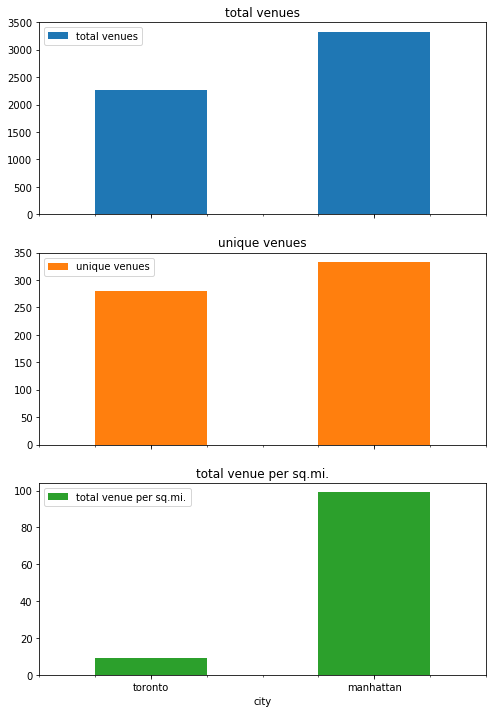

In [85]:
axes = compare.plot.bar(rot=0,subplots=True,figsize=(8,12))
axes[1].legend(loc=2)  

## 5. Conclusions <a name="5"></a>

The results of the data from Toronto and Manhattan show several similarities between the two cities:

1.	Both cities are very diverse and have a very rich environment.  This is demonstrated by the number of unique type venues returned for both; Toronto has 280 and Manhattan has 333 unique type venues.
2.	Another indication that both cities have a rich and vibrant environment is indicated by the number of venues returned for each city:  Toronto with 2258 and Manhattan with 3331 venues.
3.	Considering the results in point 2 above and the size of both cities (Manhattan has an area of 33.58 square miles while Toronto is much larger with 243.33 square miles) it seems like Manhattan has an edge over Toronto on the number of venues per square miles.  
4.	In itself both cities are similar and offer a wide variety of venue choices.  One can find almost everything they need, or can imagine, in either cities.  The difference between the two cities is that while in Manhattan one simply need to walk around in a neighborhood to find almost all type of venues, in Toronto one has to drive or take public transportation since they are spread over a much larger surface.
